BIBLIOTECAS

In [95]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [26]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

DATASET

In [27]:
path = 'dataset/adult_data.csv'
  
adult_data = pd.read_csv(path)
adult_data.head().T

,0,1,2,3,4
39,50,38,53,28,37
State-gov,Self-emp-not-inc,Private,Private,Private,Private
77516,83311,215646,234721,338409,284582
Bachelors,Bachelors,HS-grad,11th,Bachelors,Masters
13,13,9,7,13,14
Never-married,Married-civ-spouse,Divorced,Married-civ-spouse,Married-civ-spouse,Married-civ-spouse
Adm-clerical,Exec-managerial,Handlers-cleaners,Handlers-cleaners,Prof-specialty,Exec-managerial
Not-in-family,Husband,Not-in-family,Husband,Wife,Wife
White,White,White,Black,Black,White
Male,Male,Male,Male,Female,Female


In [28]:
data_header = ['Age','Workclass','fnlwgt','Education','Education-num','Marital_Status','Occupation','Relationship','Race','Sex','Capital-gain','Capital-loss','hrs_per_week','Native-Country','Earning_potential']
adult_data = pd.read_csv(path, names = data_header)
adult_data.head()

,Age,Workclass,fnlwgt,Education,Education-num,Marital_Status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,hrs_per_week,Native-Country,Earning_potential
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [29]:
adult_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                32561 non-null  int64 
 1   Workclass          32561 non-null  object
 2   fnlwgt             32561 non-null  int64 
 3   Education          32561 non-null  object
 4   Education-num      32561 non-null  int64 
 5   Marital_Status     32561 non-null  object
 6   Occupation         32561 non-null  object
 7   Relationship       32561 non-null  object
 8   Race               32561 non-null  object
 9   Sex                32561 non-null  object
 10  Capital-gain       32561 non-null  int64 
 11  Capital-loss       32561 non-null  int64 
 12  hrs_per_week       32561 non-null  int64 
 13  Native-Country     32561 non-null  object
 14  Earning_potential  32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [30]:
adult_data.sample(50)

,Age,Workclass,fnlwgt,Education,Education-num,Marital_Status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,hrs_per_week,Native-Country,Earning_potential
296,37,Self-emp-inc,57424,Bachelors,13,Divorced,Sales,Not-in-family,White,Female,0,0,60,United-States,<=50K
8806,90,Private,87372,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,20051,0,72,United-States,>50K
22431,59,Private,138370,10th,6,Married-spouse-absent,Protective-serv,Not-in-family,Asian-Pac-Islander,Male,0,0,40,India,<=50K
20138,25,Private,170786,9th,5,Never-married,Transport-moving,Other-relative,White,Male,0,0,40,United-States,<=50K
30143,54,Self-emp-not-inc,230951,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
28195,28,Private,226891,Some-college,10,Never-married,Adm-clerical,Unmarried,Asian-Pac-Islander,Female,0,0,30,?,<=50K
2323,23,?,243190,Some-college,10,Never-married,?,Own-child,Asian-Pac-Islander,Male,0,0,20,China,<=50K
1237,41,Self-emp-not-inc,209344,HS-grad,9,Married-civ-spouse,Sales,Other-relative,White,Female,0,0,40,Cuba,<=50K
18803,33,Private,183557,Assoc-acdm,12,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,40,United-States,<=50K
15533,21,Without-pay,232719,HS-grad,9,Never-married,Craft-repair,Own-child,Black,Male,0,0,40,United-States,<=50K


In [31]:
adult_data = adult_data.replace(to_replace = '%?%', value = np.nan) #replaces everything with a '?' with Nan
adult_data.isna().sum()

Age                  0
Workclass            0
fnlwgt               0
Education            0
Education-num        0
Marital_Status       0
Occupation           0
Relationship         0
Race                 0
Sex                  0
Capital-gain         0
Capital-loss         0
hrs_per_week         0
Native-Country       0
Earning_potential    0
dtype: int64

In [32]:
all_columns = list(adult_data.columns)
print('all_columns:\n {}'.format(all_columns))

categorical_columns = list(adult_data.select_dtypes(include=['object']).columns)
print('Categorical columns:\n {}'.format(categorical_columns))

numerical_columns = list(adult_data.select_dtypes(include=['int64', 'float64']).columns)
print('Numerical columns:\n {}'.format(numerical_columns))

all_columns:
 ['Age', 'Workclass', 'fnlwgt', 'Education', 'Education-num', 'Marital_Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Capital-gain', 'Capital-loss', 'hrs_per_week', 'Native-Country', 'Earning_potential']
Categorical columns:
 ['Workclass', 'Education', 'Marital_Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native-Country', 'Earning_potential']
Numerical columns:
 ['Age', 'fnlwgt', 'Education-num', 'Capital-gain', 'Capital-loss', 'hrs_per_week']


ANÁLISE EXPLORATÓRIA

In [33]:
adult_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                32561 non-null  int64 
 1   Workclass          32561 non-null  object
 2   fnlwgt             32561 non-null  int64 
 3   Education          32561 non-null  object
 4   Education-num      32561 non-null  int64 
 5   Marital_Status     32561 non-null  object
 6   Occupation         32561 non-null  object
 7   Relationship       32561 non-null  object
 8   Race               32561 non-null  object
 9   Sex                32561 non-null  object
 10  Capital-gain       32561 non-null  int64 
 11  Capital-loss       32561 non-null  int64 
 12  hrs_per_week       32561 non-null  int64 
 13  Native-Country     32561 non-null  object
 14  Earning_potential  32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [34]:
adult_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
Education-num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
Capital-gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
Capital-loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hrs_per_week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [56]:
len(categorical_columns)

9

In [57]:
numerical_columns

['Age',
 'fnlwgt',
 'Education-num',
 'Capital-gain',
 'Capital-loss',
 'hrs_per_week']

In [59]:
var_in_float = adult_data.loc[:, numerical_columns].var()
for i in range(len(numerical_columns)):
    print('{} \t\t {}'.format(numerical_columns[i], round(float(var_in_float[i]), 3)))

Age 		 186.061
fnlwgt 		 11140797791.842
Education-num 		 6.619
Capital-gain 		 54542539.178
Capital-loss 		 162376.938
hrs_per_week 		 152.459


C:\Users\animo\AppData\Local\Temp\ipykernel_12132\3213408339.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('{} \t\t {}'.format(numerical_columns[i], round(float(var_in_float[i]), 3)))


PRÉ-PROCESSAMENTO

In [68]:
null_columns = adult_data.columns[adult_data.isnull().any()]
adult_data[null_columns].isnull().sum()

Series([], dtype: float64)

In [69]:
adult_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                32561 non-null  int64 
 1   Workclass          32561 non-null  object
 2   fnlwgt             32561 non-null  int64 
 3   Education          32561 non-null  object
 4   Education-num      32561 non-null  int64 
 5   Marital_Status     32561 non-null  object
 6   Occupation         32561 non-null  object
 7   Relationship       32561 non-null  object
 8   Race               32561 non-null  object
 9   Sex                32561 non-null  object
 10  Capital-gain       32561 non-null  int64 
 11  Capital-loss       32561 non-null  int64 
 12  hrs_per_week       32561 non-null  int64 
 13  Native-Country     32561 non-null  object
 14  Earning_potential  32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [70]:
for i in list(null_columns):
    adult_data[i].fillna(adult_data[i].mode().values[0],inplace=True)

In [71]:
print('{null_sum} \n\n {adult_data_info}'.format(null_sum=adult_data.isna().sum(), adult_data_info=adult_data.info()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                32561 non-null  int64 
 1   Workclass          32561 non-null  object
 2   fnlwgt             32561 non-null  int64 
 3   Education          32561 non-null  object
 4   Education-num      32561 non-null  int64 
 5   Marital_Status     32561 non-null  object
 6   Occupation         32561 non-null  object
 7   Relationship       32561 non-null  object
 8   Race               32561 non-null  object
 9   Sex                32561 non-null  object
 10  Capital-gain       32561 non-null  int64 
 11  Capital-loss       32561 non-null  int64 
 12  hrs_per_week       32561 non-null  int64 
 13  Native-Country     32561 non-null  object
 14  Earning_potential  32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
Age                  0
Workclass          

CODIFICAÇÃO DE RÓTULOS

In [73]:
adult_data[categorical_columns].head()

,Workclass,Education,Marital_Status,Occupation,Relationship,Race,Sex,Native-Country,Earning_potential
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


In [74]:
label_encoder = LabelEncoder()
encoded_adult_data = adult_data
for i in categorical_columns:
    encoded_adult_data[i] = label_encoder.fit_transform(adult_data[i])
encoded_adult_data[categorical_columns].head()

,Workclass,Education,Marital_Status,Occupation,Relationship,Race,Sex,Native-Country,Earning_potential
0,7,9,4,1,1,4,1,39,0
1,6,9,2,4,0,4,1,39,0
2,4,11,0,6,1,4,1,39,0
3,4,1,2,6,0,2,1,39,0
4,4,9,2,10,5,2,0,5,0


DIMENSIONANDO OS DADOS

In [75]:
min_max_scaler = MinMaxScaler()

scaled_encoded_adult_data = pd.DataFrame()

column_values = encoded_adult_data.columns.values
column_values = column_values[:-1]
print(column_values[-1])

scaled_values = min_max_scaler.fit_transform(encoded_adult_data[column_values])

for i in range(len(column_values)):
    scaled_encoded_adult_data[column_values[i]] = scaled_values[:,i]
    
scaled_encoded_adult_data['Earning_potential'] = encoded_adult_data['Earning_potential']
scaled_encoded_adult_data.sample(10)

Native-Country


,Age,Workclass,fnlwgt,Education,Education-num,Marital_Status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,hrs_per_week,Native-Country,Earning_potential
16842,0.178082,0.500,0.151692,0.000000,0.333333,0.333333,0.214286,0.0,1.0,1.0,0.000000,0.000000,0.397959,0.951220,0
29353,0.356164,0.500,0.088807,0.733333,0.533333,0.333333,0.500000,1.0,1.0,0.0,0.000000,0.000000,0.397959,0.292683,0
26816,0.506849,0.500,0.015805,1.000000,0.600000,0.333333,0.857143,0.0,1.0,1.0,0.072981,0.000000,0.500000,0.951220,1
4902,0.410959,0.500,0.058106,1.000000,0.600000,0.333333,0.214286,0.0,1.0,1.0,0.000000,0.000000,0.397959,0.951220,0
13692,0.287671,0.875,0.208229,0.600000,0.800000,0.333333,0.785714,0.0,0.5,1.0,0.000000,0.000000,0.520408,0.951220,0
22838,0.561644,0.250,0.027978,0.800000,0.866667,0.666667,0.714286,0.2,1.0,1.0,0.000000,0.000000,0.346939,0.951220,0
24426,0.301370,0.500,0.091832,0.733333,0.533333,0.333333,0.714286,1.0,0.5,0.0,0.000000,0.000000,0.397959,0.951220,0
29718,0.219178,0.750,0.107778,0.933333,0.933333,0.333333,0.714286,0.0,1.0,1.0,0.000000,0.433196,0.397959,0.951220,1
18258,0.383562,0.500,0.069392,0.733333,0.533333,0.333333,0.214286,0.0,1.0,1.0,0.000000,0.000000,0.500000,0.951220,1
5875,0.328767,0.750,0.073521,1.000000,0.600000,0.333333,0.500000,0.0,1.0,1.0,0.031030,0.000000,0.397959,0.951220,1


In [76]:
scaled_encoded_adult_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                32561 non-null  float64
 1   Workclass          32561 non-null  float64
 2   fnlwgt             32561 non-null  float64
 3   Education          32561 non-null  float64
 4   Education-num      32561 non-null  float64
 5   Marital_Status     32561 non-null  float64
 6   Occupation         32561 non-null  float64
 7   Relationship       32561 non-null  float64
 8   Race               32561 non-null  float64
 9   Sex                32561 non-null  float64
 10  Capital-gain       32561 non-null  float64
 11  Capital-loss       32561 non-null  float64
 12  hrs_per_week       32561 non-null  float64
 13  Native-Country     32561 non-null  float64
 14  Earning_potential  32561 non-null  int32  
dtypes: float64(14), int32(1)
memory usage: 3.6 MB


In [77]:
scaled_encoded_adult_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,32561.0,0.295639,0.186855,0.0,0.150685,0.273973,0.424658,1.0
Workclass,32561.0,0.483612,0.181995,0.0,0.500000,0.500000,0.500000,1.0
fnlwgt,32561.0,0.120545,0.071685,0.0,0.071679,0.112788,0.152651,1.0
Education,32561.0,0.686547,0.258018,0.0,0.600000,0.733333,0.800000,1.0
Education-num,32561.0,0.605379,0.171515,0.0,0.533333,0.600000,0.733333,1.0
Marital_Status,32561.0,0.435306,0.251037,0.0,0.333333,0.333333,0.666667,1.0
Occupation,32561.0,0.469481,0.302061,0.0,0.214286,0.500000,0.714286,1.0
Relationship,32561.0,0.289272,0.321354,0.0,0.000000,0.200000,0.600000,1.0
Race,32561.0,0.916464,0.212201,0.0,1.000000,1.000000,1.000000,1.0
Sex,32561.0,0.669205,0.470506,0.0,0.000000,1.000000,1.000000,1.0


DETECÇÃO DE OUTLIER

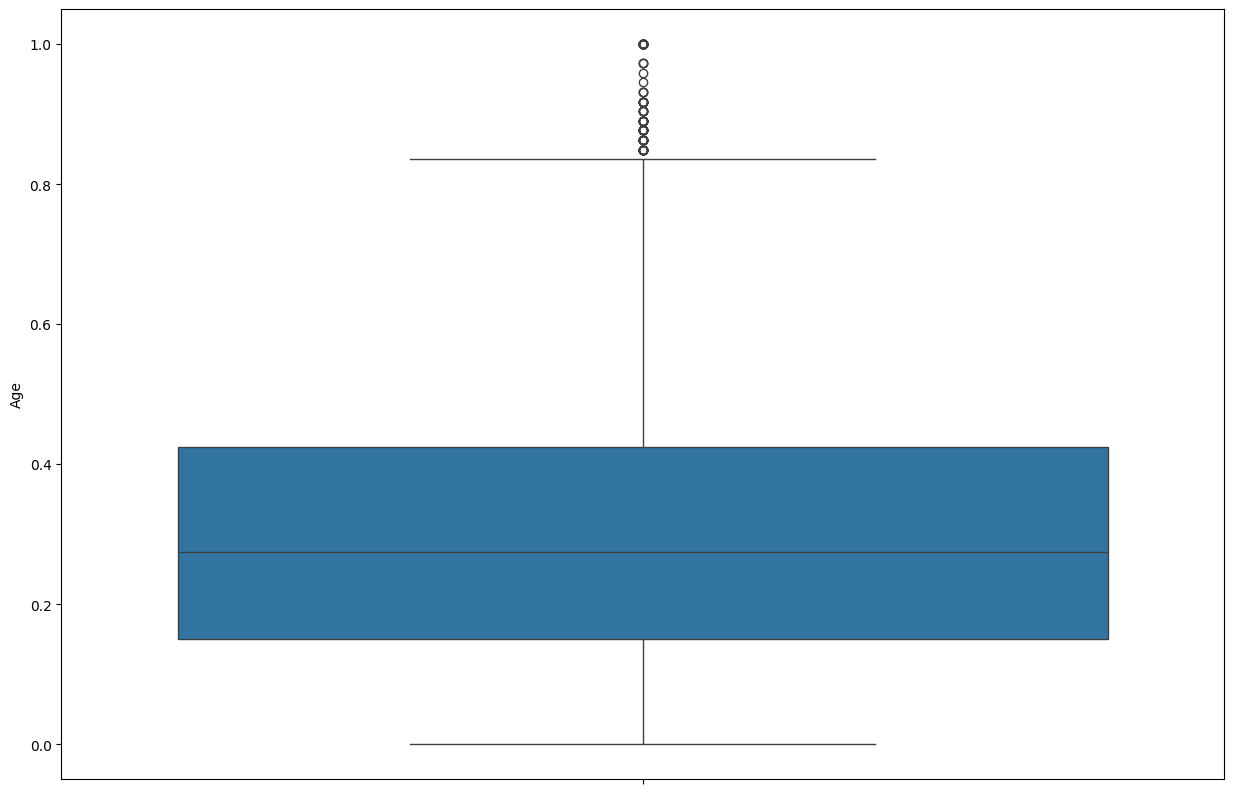

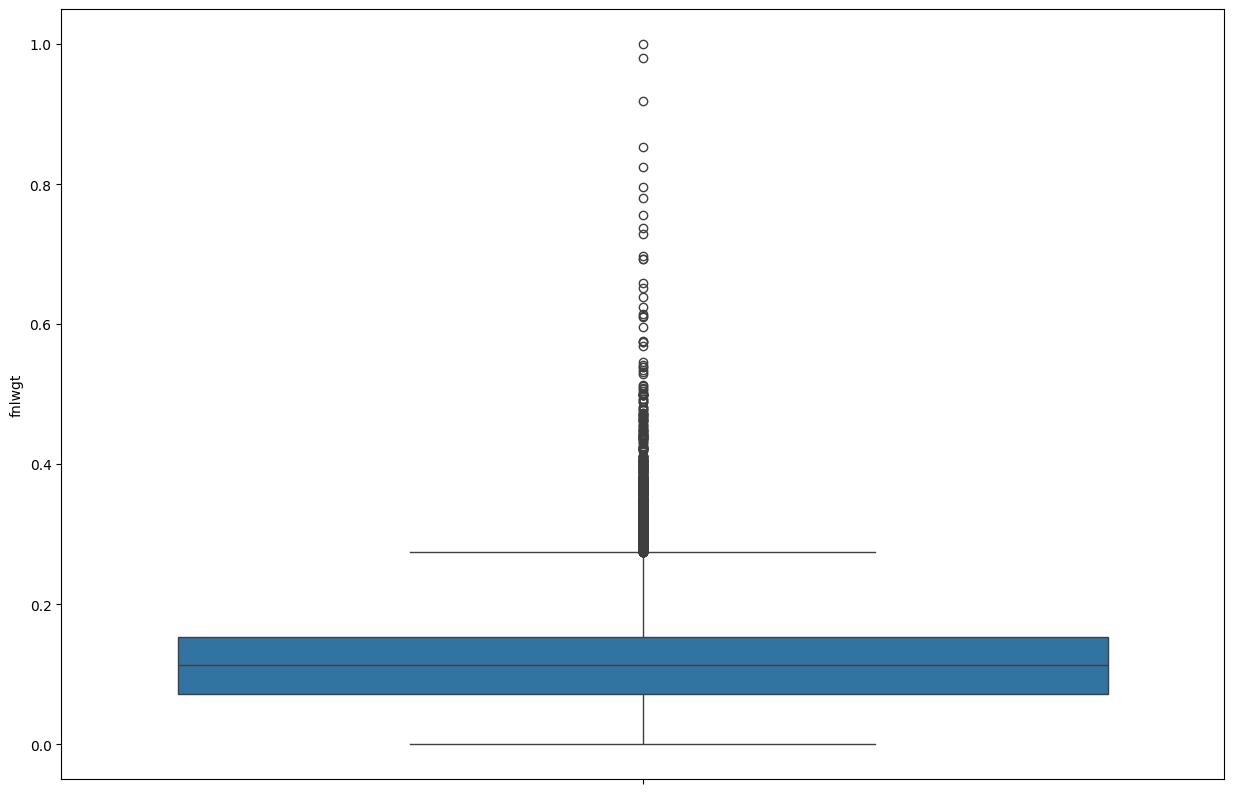

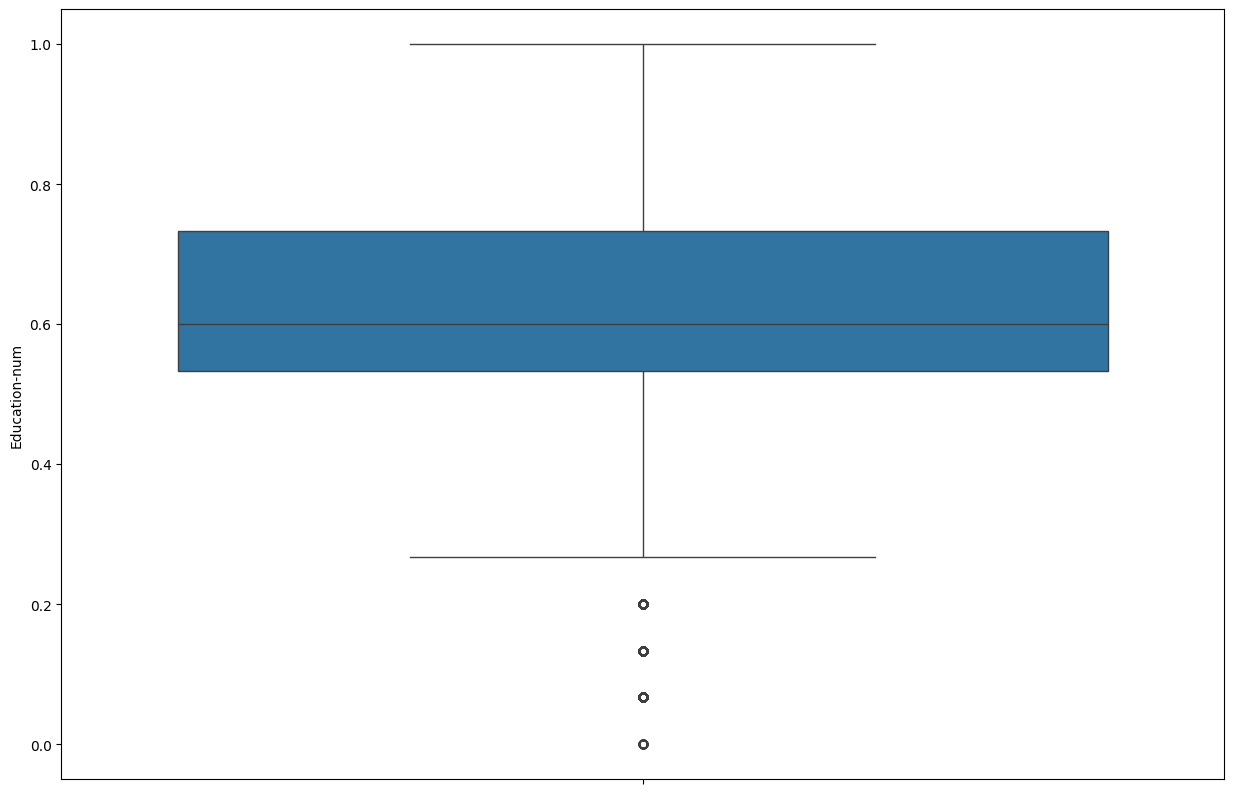

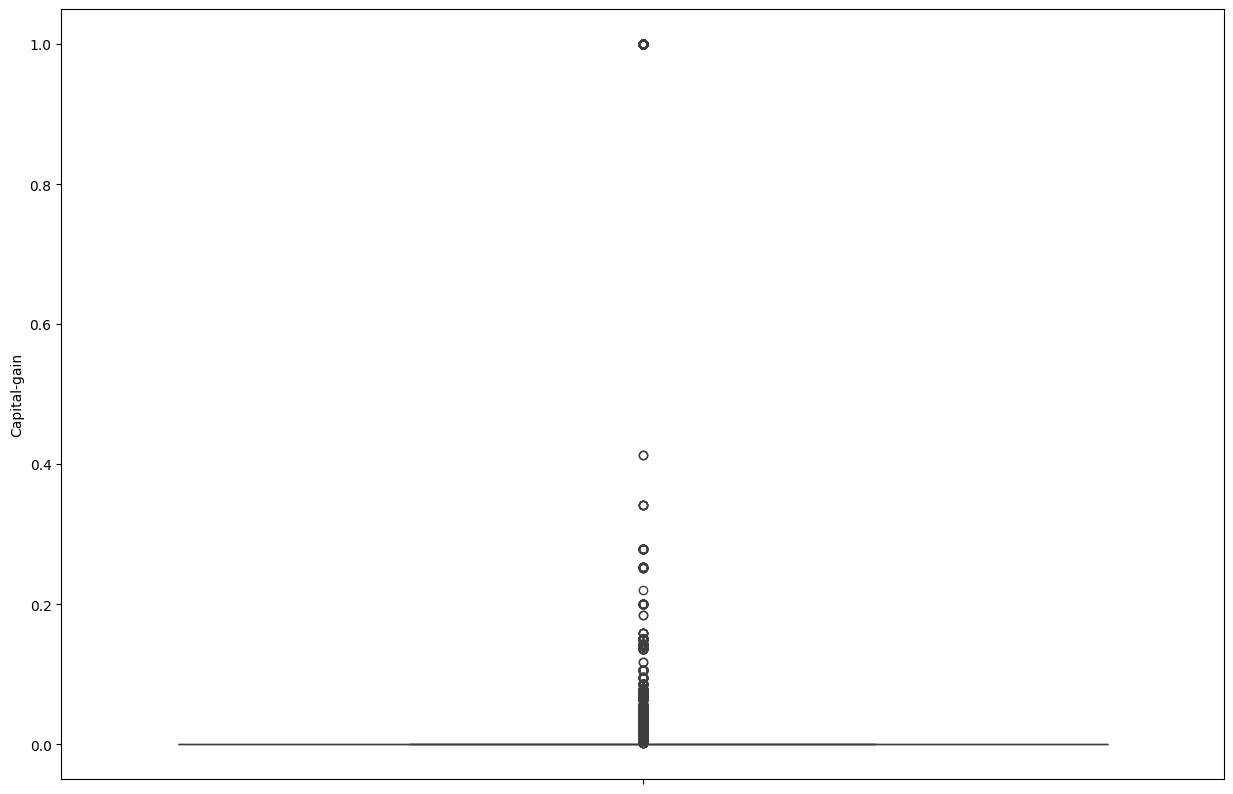

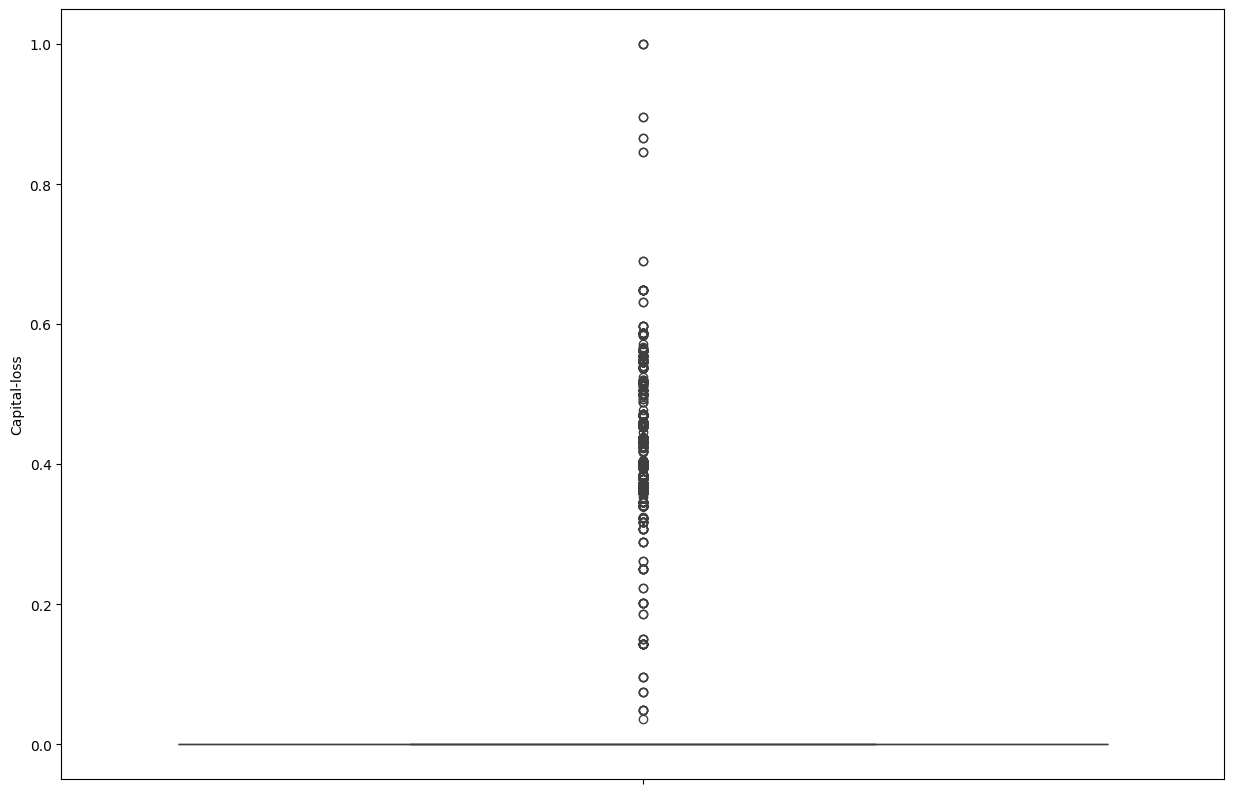

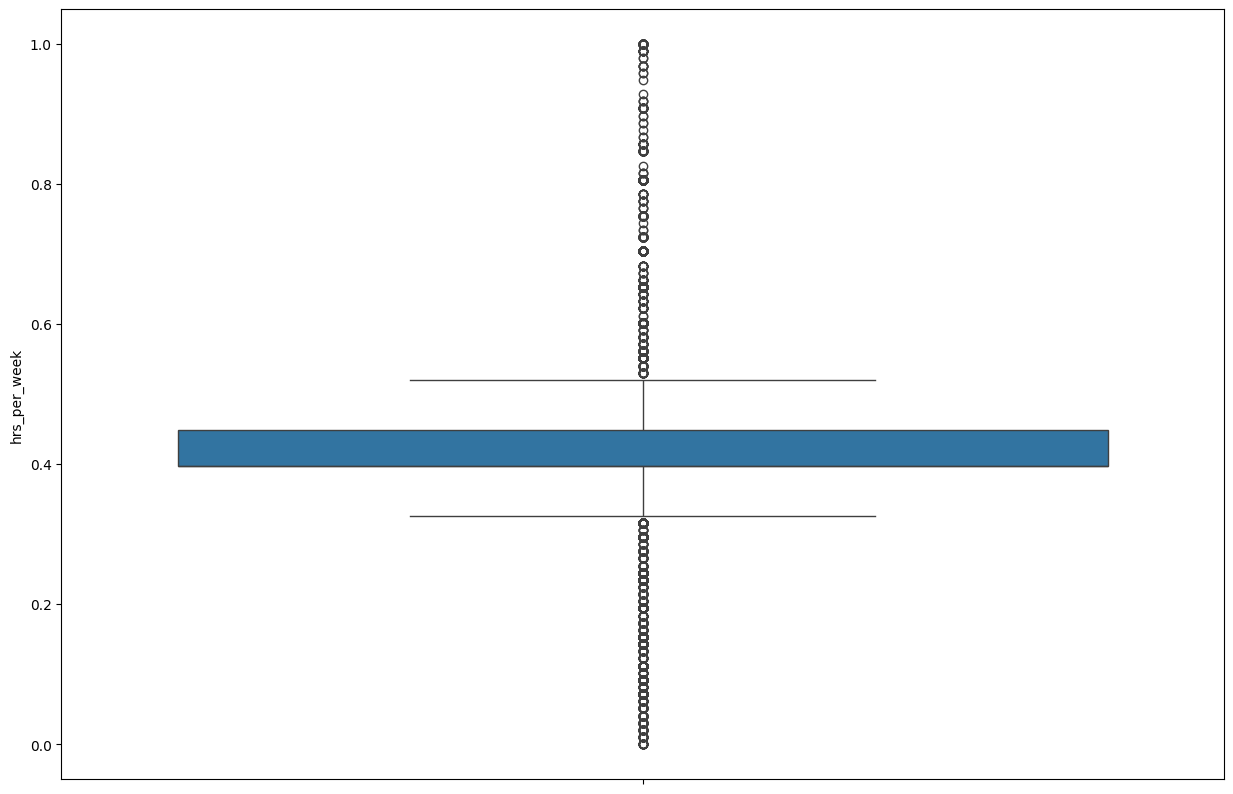

In [78]:
for i in range(len(numerical_columns)):
    plt.figure(figsize=(15,10))
    sns.boxplot(scaled_encoded_adult_data[numerical_columns[i]])
plt.show() 

TRATAMENTO DE OUTLIERS (SUBSTITUIÇÃO PELA MEDIANA)

In [79]:
def outlier_detector(datacolumn):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn,[25,75])
    IQR = Q3 - Q1
    lower_bound = Q1-(1.5*IQR)
    upper_bound = Q3+(1.5*IQR)
    return lower_bound,upper_bound

In [80]:
lowerbound, upperbound = outlier_detector(scaled_encoded_adult_data['Age'])
lowerbound, upperbound

(-0.2602739726027397, 0.8356164383561644)

In [81]:
scaled_encoded_adult_data[(scaled_encoded_adult_data.Age < lowerbound) | (scaled_encoded_adult_data.Age > upperbound)]

,Age,Workclass,fnlwgt,Education,Education-num,Marital_Status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,hrs_per_week,Native-Country,Earning_potential
74,0.849315,0.500,0.076377,1.000000,0.600000,0.333333,0.714286,0.4,1.00,1.0,0.000000,0.000000,0.193878,0.951220,0
222,1.000000,0.500,0.026799,0.733333,0.533333,0.666667,0.571429,0.2,0.50,1.0,0.000000,0.506428,0.397959,0.951220,0
430,0.863014,0.000,0.064844,0.733333,0.533333,1.000000,0.000000,0.2,1.00,1.0,0.000000,0.000000,0.234694,0.951220,0
918,0.876712,0.750,0.084064,0.733333,0.533333,0.333333,0.285714,0.0,1.00,1.0,0.000000,0.000000,0.295918,0.951220,0
1040,1.000000,0.500,0.084713,0.733333,0.533333,0.666667,0.571429,0.2,1.00,0.0,0.000000,0.000000,0.397959,0.951220,0
1168,0.972603,0.750,0.131760,0.933333,0.933333,0.333333,0.714286,0.0,1.00,1.0,0.000000,0.000000,0.397959,0.951220,0
1935,1.000000,0.500,0.142315,0.600000,0.800000,0.333333,0.285714,0.0,1.00,1.0,0.000000,0.000000,0.448980,0.951220,0
2303,1.000000,0.500,0.027235,1.000000,0.600000,0.666667,0.571429,0.2,0.25,1.0,0.000000,0.000000,0.346939,0.951220,0
2754,0.863014,0.750,0.116848,0.333333,0.200000,0.333333,0.357143,0.0,1.00,1.0,0.000000,0.000000,0.295918,0.951220,0
2891,1.000000,0.500,0.108441,1.000000,0.600000,0.833333,0.071429,0.6,1.00,0.0,0.000000,0.000000,0.397959,0.804878,0


In [82]:
new_columns = numerical_columns.copy()
new_columns.remove('Capital-gain') #Sparse column, must not be treated
new_columns.remove('Capital-loss') #Sparse column, must not be treated
new_columns

['Age', 'fnlwgt', 'Education-num', 'hrs_per_week']

In [86]:
treated_scaled_encoded_adult_data = scaled_encoded_adult_data.copy()

for i in new_columns:
    lowerbound, upperbound = outlier_detector(treated_scaled_encoded_adult_data[i])
    median = treated_scaled_encoded_adult_data[i].median()
    
    # Selecionar os valores que estão fora do intervalo e substituí-los pela mediana
    treated_scaled_encoded_adult_data.loc[(treated_scaled_encoded_adult_data[i] < lowerbound) | 
                                          (treated_scaled_encoded_adult_data[i] > upperbound), i] = median
    
    print('{}: number of outliers: {}'.format(i,treated_scaled_encoded_adult_data[
        (treated_scaled_encoded_adult_data[i] < lowerbound) |
        (treated_scaled_encoded_adult_data[i] > upperbound)][i]))

Age: number of outliers: Series([], Name: Age, dtype: float64)
fnlwgt: number of outliers: Series([], Name: fnlwgt, dtype: float64)
Education-num: number of outliers: Series([], Name: Education-num, dtype: float64)
hrs_per_week: number of outliers: Series([], Name: hrs_per_week, dtype: float64)


In [87]:
print(all_columns)

features = all_columns[:-1]
target = treated_scaled_encoded_adult_data['Earning_potential']
print(features)
print(treated_scaled_encoded_adult_data.shape)

['Age', 'Workclass', 'fnlwgt', 'Education', 'Education-num', 'Marital_Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Capital-gain', 'Capital-loss', 'hrs_per_week', 'Native-Country', 'Earning_potential']
['Age', 'Workclass', 'fnlwgt', 'Education', 'Education-num', 'Marital_Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Capital-gain', 'Capital-loss', 'hrs_per_week', 'Native-Country']
(32561, 15)


CÓPIA DO DATAFRAME PRINCIPAL A SER UTILIZADO PARA TREINO

In [88]:
feature_df = treated_scaled_encoded_adult_data[features]
print(target.head())
feature_df.head()

0    0
1    0
2    0
3    0
4    0
Name: Earning_potential, dtype: int32


,Age,Workclass,fnlwgt,Education,Education-num,Marital_Status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,hrs_per_week,Native-Country
0,0.301370,0.875,0.044302,0.600000,0.800000,0.666667,0.071429,0.2,1.0,1.0,0.02174,0.0,0.397959,0.951220
1,0.452055,0.750,0.048238,0.600000,0.800000,0.333333,0.285714,0.0,1.0,1.0,0.00000,0.0,0.397959,0.951220
2,0.287671,0.500,0.138113,0.733333,0.533333,0.000000,0.428571,0.2,1.0,1.0,0.00000,0.0,0.397959,0.951220
3,0.493151,0.500,0.151068,0.066667,0.400000,0.333333,0.428571,0.0,0.5,1.0,0.00000,0.0,0.397959,0.951220
4,0.150685,0.500,0.221488,0.600000,0.800000,0.333333,0.714286,1.0,0.5,0.0,0.00000,0.0,0.397959,0.121951


TRAIN TEST SPLIT

In [89]:
x_train, x_test, y_train, y_test = train_test_split(feature_df, target, test_size=0.2)

In [90]:
print(x_train.shape,y_train.shape, x_test.shape, y_test.shape)

(26048, 14) (26048,) (6513, 14) (6513,)


CLASSIFICADOR KNN

In [91]:
error_rate = []
# Vai levar algum tempo
k_values = list(filter(lambda x: x%2==1, range(0,50)))
best_k = 0
for i in k_values:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))
print(error_rate.index(np.min(error_rate)))

9


In [92]:
knn_classifier = KNeighborsClassifier(n_neighbors=19)
knn_classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=19)

In [93]:
knn_train_score = knn_classifier.score(x_train, y_train)
knn_test_score = knn_classifier.score(x_test, y_test)

print('Train score: {}\nTest score: {}'.format(knn_train_score, knn_test_score))

Train score: 0.8460150491400491
Test score: 0.8361738062336864


In [96]:
knn_prediction = knn_classifier.predict(x_test)

knn_classifier_mse = mean_squared_error(y_test, knn_prediction)
knn_classifier_rmse = np.sqrt(knn_classifier_mse)

print('MSE: {}\nRMSE: {}'.format(knn_classifier_mse, knn_classifier_rmse))

MSE: 0.16382619376631352
RMSE: 0.4047544857889947


CLASSIFICADOR SVM 

In [97]:
svc = SVC(kernel='rbf')
svc.fit(x_train, y_train)

SVC()

In [98]:
svc_train_score = svc.score(x_train, y_train)
svc_test_score = svc.score(x_test, y_test)

print('Train score: {}\nTest score: {}'.format(svc_train_score, svc_test_score))

Train score: 0.8457463144963145
Test score: 0.8426224474128666


In [99]:
svc_prediction = svc.predict(x_test)

svc_mse = mean_squared_error(y_test, svc_prediction)
svc_rmse = np.sqrt(svc_mse)

print('MSE: {}\nRMSE: {}'.format(svc_mse, svc_rmse))

MSE: 0.15737755258713343
RMSE: 0.3967083974245232


CLASSIFICADOR ÁRVORE DE DECISÃO

In [100]:
dtree_classifier = DecisionTreeClassifier(min_impurity_decrease = 0.05)
dtree_classifier.fit(x_train, y_train)

DecisionTreeClassifier(min_impurity_decrease=0.05)

In [101]:
dtree_train_score = dtree_classifier.score(x_train, y_train)
dtree_test_score = dtree_classifier.score(x_test, y_test)

print('Train score: {}\nTest score: {}'.format(dtree_train_score, dtree_test_score))

Train score: 0.7572558353808354
Test score: 0.7669276830953478


In [102]:
dtree_prediction = dtree_classifier.predict(x_test)

dtree_mse = mean_squared_error(y_test, svc_prediction)
dtree_rmse = np.sqrt(dtree_mse)

print('MSE: {}\nRMSE: {}'.format(dtree_mse, dtree_rmse))

MSE: 0.15737755258713343
RMSE: 0.3967083974245232


COMPARAÇÃO DAS ACURÁCIAS ENTRE OS MODELOS

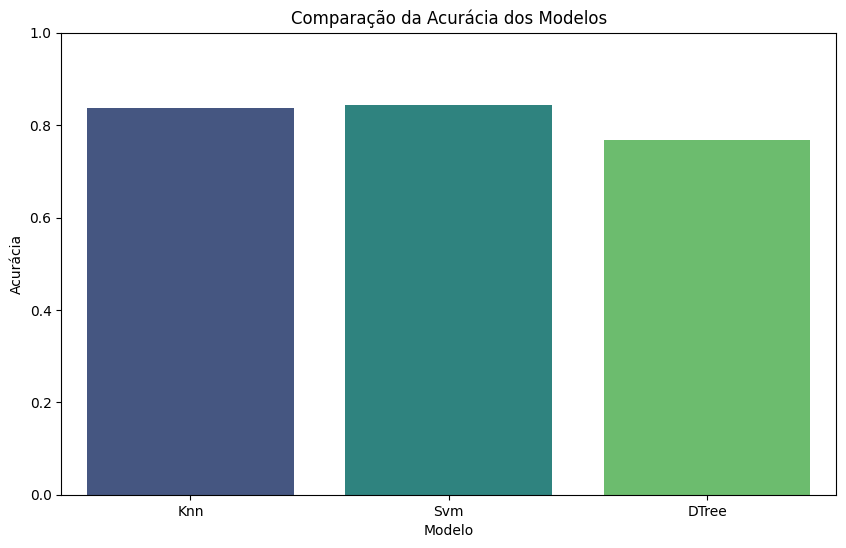

In [104]:
accuracies = [knn_test_score, svc_test_score, dtree_test_score]

model_names = ['Knn', 'Svm', 'DTree']

plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=accuracies, hue=model_names, palette='viridis', legend=False)
plt.title('Comparação da Acurácia dos Modelos')
plt.xlabel('Modelo')
plt.ylabel('Acurácia')
plt.ylim(0, 1)
plt.show()